# Activity 3 - Stellar Sturcture part 2

Make sure you read the instructions carefully!

## Introduction

In Activity 2, we found the mass profile for a star with:
- density profile  $\rho = \rho_0 e^{−r/R}$
- central density is $\rho_0 = 100$ g/cm$^3$
- total radius is $R = 10^{10}$ cm.

Copy over the code you wrote for Activity 2 Exercise 2, then run it to make sure it still works.

In [2]:
# Make sure you import the packages we need by running this cell
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Code from Activity 2:

# define the star's properties
rho_0 = 100   # g/cm3
r_tot = 1e10  # cm

# calculate total mass in cgs
nshells = 100         # number of shell layers
dr = r_tot / nshells  # thickness of each shell

# starting conditions
r = 0.0   # cm
m = 0.0   # g

# loop through all shells & keep a running total of mass
for i in range(0,nshells):
  r = i * dr                              # radius of this shell
  rho = rho_0 * np.exp(-1 * r / r_tot)    # density of this shell
  m = m + rho *  4 * np.pi * r**2 * dr    # mass interior + mass of this shell

print(m, ' g')  # cgs

# convert to solar masses
m_solar = m / 2e33     #g
print(m_solar, 'Msun')

1.9951182091661014e+32  g
0.09975591045830508 Msun


You should have gotten a 0.1 Msun star.



---



## Exercise 1

We're going to modify and build onto this model. Let's define another boundary condition and assume the central pressure is $P(0) = 2.5 \times 10^{17}$ g/cm$^2$s$^2$.

\

**Instructions:**  Use numerical integration (adding up thin shells) and the equations of stellar structure to find the pressure profile $P(r)$ of our model star. This [webpage](https://sites.astro.caltech.edu/~george/constants.html) has the values for lots of useful constants you may need.

\



**Step 1** - In Activity 2, we calculated the radius of each shell within the loop, but never saved it into an array. This time, create an numpy array for the radius of each shell layer by using the *np.arange(N)* command. This creates an array of N elements with increasing values, like [0,1,2,3... N-1]. If you multiply this array by the shell thickness, you'll get an array with the radius of each shell.

In [4]:
# define the star's properties
rho_0 = 100   # g/cm3
r_tot = 1e10  # cm

# setup our shell layers
nshells = 100                 # number of shell layers
dr = r_tot / nshells          # thickness of each shell

# radius array
r = np.arange(nshells) * dr   # cm
print(r)


[0.0e+00 1.0e+08 2.0e+08 3.0e+08 4.0e+08 5.0e+08 6.0e+08 7.0e+08 8.0e+08
 9.0e+08 1.0e+09 1.1e+09 1.2e+09 1.3e+09 1.4e+09 1.5e+09 1.6e+09 1.7e+09
 1.8e+09 1.9e+09 2.0e+09 2.1e+09 2.2e+09 2.3e+09 2.4e+09 2.5e+09 2.6e+09
 2.7e+09 2.8e+09 2.9e+09 3.0e+09 3.1e+09 3.2e+09 3.3e+09 3.4e+09 3.5e+09
 3.6e+09 3.7e+09 3.8e+09 3.9e+09 4.0e+09 4.1e+09 4.2e+09 4.3e+09 4.4e+09
 4.5e+09 4.6e+09 4.7e+09 4.8e+09 4.9e+09 5.0e+09 5.1e+09 5.2e+09 5.3e+09
 5.4e+09 5.5e+09 5.6e+09 5.7e+09 5.8e+09 5.9e+09 6.0e+09 6.1e+09 6.2e+09
 6.3e+09 6.4e+09 6.5e+09 6.6e+09 6.7e+09 6.8e+09 6.9e+09 7.0e+09 7.1e+09
 7.2e+09 7.3e+09 7.4e+09 7.5e+09 7.6e+09 7.7e+09 7.8e+09 7.9e+09 8.0e+09
 8.1e+09 8.2e+09 8.3e+09 8.4e+09 8.5e+09 8.6e+09 8.7e+09 8.8e+09 8.9e+09
 9.0e+09 9.1e+09 9.2e+09 9.3e+09 9.4e+09 9.5e+09 9.6e+09 9.7e+09 9.8e+09
 9.9e+09]


**Step 2** - Calculate the density profile array using the radius array.

In [5]:
# density profile in g/cm3
rho = rho_0 * np.exp(-1 * r / r_tot)
print(rho)


[100.          99.00498337  98.01986733  97.04455335  96.07894392
  95.12294245  94.17645336  93.23938199  92.31163464  91.39311853
  90.4837418   89.58341353  88.69204367  87.80954309  86.93582354
  86.07079764  85.2143789   84.36648166  83.52702114  82.69591339
  81.87307531  81.0584246   80.2518798   79.45336025  78.66278611
  77.88007831  77.10515858  76.33794943  75.57837415  74.82635676
  74.08182207  73.34469562  72.61490371  71.89237334  71.17703228
  70.46880897  69.76763261  69.07343306  68.38614092  67.70568745
  67.0320046   66.36502501  65.70468198  65.05090947  64.40364211
  63.76281516  63.12836455  62.50022683  61.87833918  61.26263942
  60.65306597  60.04955788  59.4520548   58.86049697  58.27482524
  57.69498104  57.12090638  56.55254387  55.98983666  55.43272847
  54.88116361  54.33508691  53.79444376  53.2591801   52.7292424
  52.20457768  51.68513345  51.17085778  50.66169924  50.15760691
  49.65853038  49.16441975  48.6752256   48.19089901  47.71139155
  47.236655

**Step 3** - Create empty numpy arrays for the enclosed mass $m(r)$ and pressure $P(r)$ variables, so we can save them as a function of radius later. You can use the *np.zeros(N)* so create an array with N elements set to 0.

In [6]:
# setup empty arrays for enclosed mass and pressure
m = np.zeros(nshells)   # g         mass interior to r
p = np.zeros(nshells)   # g/cm2/s2  pressure profile


**Step 4** - Set the values for the first shell (at the center) manually, based on the known boundary conditions.

In [7]:
# do the first shell (r=0) manually
m[0] = 0.0      # g
p[0] = 2.5e17   # g/cm2/s2


**Step 5** - Create a loop that calculates the enclosed mass and pressure of each shell. We already did the central shell (i=0) so start your loop at i=1 and work outwards. You can use your loop from Activity 2 as a starting point, but should modify it to use the variables/arrays we defined above.  Save the values for the mass and pressure of each shell into their arrays.

In [17]:
# loop through all outer shells
# calculate enclosed mass and pressure at each shell

for i in range(1,nshells):

  # mass interior to r
  # equation of mass conservation
  # dm = 4 pi r^2 rho(r) dr
  mshell = 4 * np.pi * r[i]**2 * rho[i] * dr   # mass of this shell
  m[i] = m[i-1] + mshell                       # mass interior to r

  # pressure
  # equation of hydrostatic equilibrium
  # dP = - G * m * rho * dr / r^2
  G = 6.67e-8   # cm3 / g1 s2
  dP = - G * m[i] * rho[i] * dr / r[i]**2       # change in pressure from last shell to this one
  p[i] = p[i-1] + dP                            # pressure of this shell



**Step 6** - Make plots of the enclosed mass as a function of radius. Add axis labels with units. If you have time, plot the mass in Solar masses and radius in fractions of the total radius (instead of cgs units).

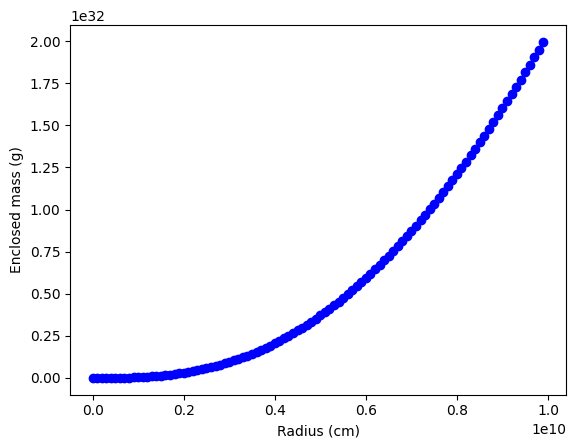

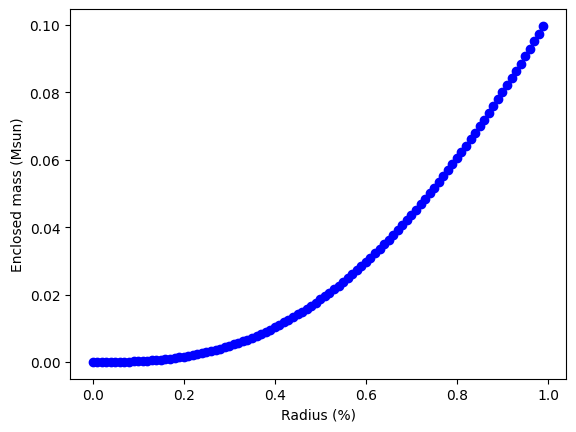

In [18]:
# plot mass profile
plt.plot(r, m, 'bo')
plt.xlabel('Radius (cm)')
plt.ylabel('Enclosed mass (g)')
plt.show()

plt.plot(r/r_tot, m/2e33, 'bo')
plt.xlabel('Radius (%)')
plt.ylabel('Enclosed mass (Msun)')
plt.show()


**Step 7** - Make plots of the pressure as a function of radius. Add axis labels with units.

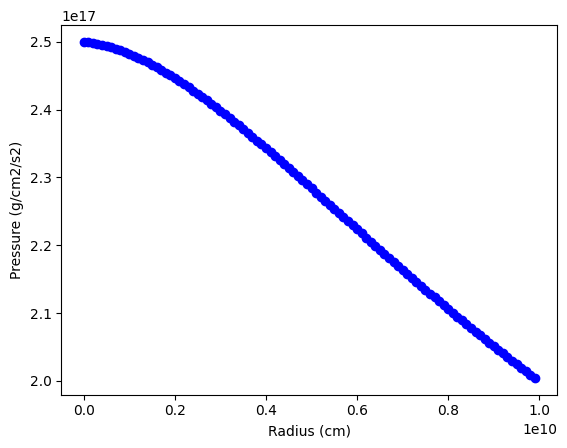

In [19]:
# plot pressure profile
plt.plot(r, p, 'bo')
plt.xlabel('Radius (cm)')
plt.ylabel('Pressure (g/cm2/s2)')
plt.show()


**Step 8** - Answer the following questions in a text box below.

Does our pressure profile look realistic?

If not, is there another boundary condition that we're not meeting?

How could we make our model more realistic?

> The pressure does not look very realistic because it should drop exponentially and go to 0 at the surface. We would need a better density profile to use in our model, possibly from a numerical simulation or stellar structure model.

---

## Exercise 2
Let's model a random walk! In the cell below is a piece of code that simulates a random walk in two dimensions.

\

**Step 1** - Run the (second) cell a few times to see how the result changes. Then, annotate each line of the code describing what it is doing.

In [11]:
# import the package to generate random numbers
import random

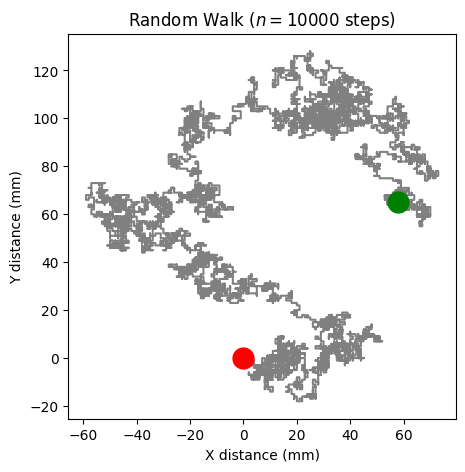

In [12]:
n = 10000        # number of steps

x = np.zeros(n)   # setting up arrays to hold the coordinates for the walk
y = np.zeros(n)

for i in range(1, n):           # loop for the number of steps
    val = random.randint(1, 4)  # choose a random direction for the next step
    if val == 1:                # go right
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2:              # go left
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    elif val == 3:              # go up
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:                        # go down
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1

# make a plot of the random walk positions
plt.figure(figsize=(5,5))
plt.plot(x, y, color="gray")              # plot the path in grey
plt.plot(x[0],y[0],'ro', markersize=15)   # plot the starting position
plt.plot(x[-1],y[-1],'go', markersize=15) # plot the ending position
plt.xlabel('X distance (mm)')             # add axis labels
plt.ylabel('Y distance (mm)')
plt.title("Random Walk ($n = " + str(n) + "$ steps)") # add a title
plt.show()                                 # display the plot

**Step 2** - Copy the code above into a new cell below (you can remove the plotting section). Add a line of code that calculates the straight line distance from the starting point to the end point of the walker and a line to print the result. Run it a few times to get a sense for how much the result changes.  

In [13]:
#modified code here

n = 10000        # number of steps

x = np.zeros(n)   # setting up arrays to hold the coordinates for the walk
y = np.zeros(n)

for i in range(1, n):           # loop for the number of steps
    val = random.randint(1, 4)  # choose a random direction for the next step
    if val == 1:                # go right
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2:              # go left
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    elif val == 3:              # go up
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:                        # go down
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1

# calculate the net distance traveled
distance = np.sqrt( (x[-1] - x[0])**2  +  (y[-1] - y[0])**2 )
print(distance, ' mm')


74.94664769020693  mm


**Step 3** - Copy the code from Step 2 into a new cell and add a loop that runs the simulation 10 times and appends the net distance traveled to an array. Then add a line to print out the mean distance traveled over all iterations.

In [14]:
#modified code here
n = 10000        # number of steps

x = np.zeros(n)   # setting up arrays to hold the coordinates for the walk
y = np.zeros(n)
d = []            # array to hold the distances
# you can also make an empty array with 10 elements (np.zeros(10))
#   and fill the values in inside the loop

for j in range(0, 10):            # loop over 10 iterations
  for i in range(1, n):           # loop for the number of steps
      val = random.randint(1, 4)  # choose a random direction for the next step
      if val == 1:                # go right
          x[i] = x[i - 1] + 1
          y[i] = y[i - 1]
      elif val == 2:              # go left
          x[i] = x[i - 1] - 1
          y[i] = y[i - 1]
      elif val == 3:              # go up
          x[i] = x[i - 1]
          y[i] = y[i - 1] + 1
      else:                        # go down
          x[i] = x[i - 1]
          y[i] = y[i - 1] - 1

  # calculate the net distance traveled
  d = np.append(d, np.sqrt( (x[-1] - x[0])**2  +  (y[-1] - y[0])**2 ))
  #print(d[j])

mean_d = np.mean(d)
print(' mean distance = ', mean_d, ' mm')



 mean distance =  89.79081681786857  mm


**Step 4** - Assuming the mean free path is the same as the Sun's ($l = 1$ mm), write a function to calculate the time it takes to escape the a star of given radius.

In [15]:
# write function here
def escape_time(radius_solar):
  radius_cgs = radius_solar * 7e10    # convert to cm
  l = 0.1     # mead free path in cm
  c = 3e10    # speed of light in cm/s
  time_sec = radius_cgs**2 / (l * c)            # escape time in seconds
  time_years = time_sec / 60 / 60 / 24 / 365    # convert to years
  return(time_years)


**Step 5** - Use your function to calculate the time for a photon to escape the following stars:

(a) a B star with M = 5 Msun, R = 2 Rsun

(b) an F star with M = 1.25 Msun, R = 1.2 Rsun

(c) an M star with M = 0.5 Msun, R = 0.4 Msun


Have your code print out the times in years for each star (and labeled by stellar mass).

In [16]:
# write code here

print(' B star  time = ', escape_time(2.0), ' years')
print(' F star  time = ', escape_time(1.2), ' years')
print(' M star  time = ', escape_time(0.4), ' years')


 B star  time =  207170.6409605953  years
 F star  time =  74581.43074581432  years
 M star  time =  8286.82563842381  years




---



---

## Final instructions

If you're done early, go back to Exercise 1 and try coding the other two equations of stellar structure to get $L(r)$ and $T(r)$!  (bonus)

\

Finish any remaining exercises, then **send your notebook to me by the end of class on Oct 12** to get participation credit. You can download the .ipynb file and email it, or send me a google drive link to your notebook.

\

If you're finishing the activity at home and run into python problems, don't worry about getting the code exactly right. This isn't a coding class and I'm not grading you on how well you know python. If you're stuck, add a text box and explain what you're trying to do **in words**. Then I'll know you have the right idea and know how to apply the content, even if the python code itself is not working.
